#### Module: Understanding Artificial Intelligence
#### Student ID: 201910321
##### AI Convolutional  Neural Network 
##### Vehicle Classification 


##### Importing libraries 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import cv2 # open-cv used for image processing %matplotlib inline

In [2]:
train_dir = r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/train"

test_dir = r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/test"

In [3]:
image = cv2.imread(r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/train/0.jpg")
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) # converting to RGB

##### Reading the first image

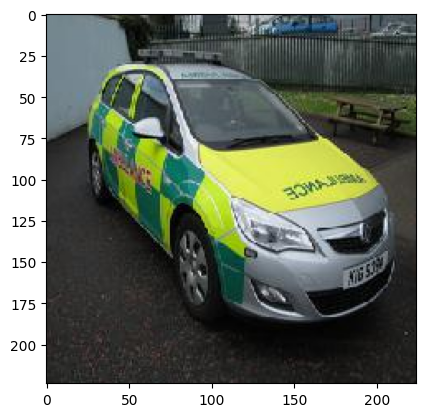

In [4]:
plt.imshow(image)

In [5]:
image.shape

(224, 224, 3)

##### Preprocessing

In [6]:
from keras.preprocessing.image import ImageDataGenerator 

In [7]:
'''
rotation_range: Rotates the image randomly between the specified range.
width_shift_range: Translates the image horizontally by the specified range.
height_shift_range: Translates the image vertically by the specified range.
shear_range: Shears the image randomly between the specified range.
zoom_range: Zooms the image randomly between the specified range.
fill_mode: Fills the area outside the image with a random value.
horizontal_flip: Flips the image horizontally.
rescale: Rescales the image by the specified factor.
'''
image_gen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1, 
    height_shift_range=0.1,
    shear_range=0.20, 
    zoom_range=0.20, 
    fill_mode='nearest', 
    horizontal_flip=True, 
    rescale=1/255 
)

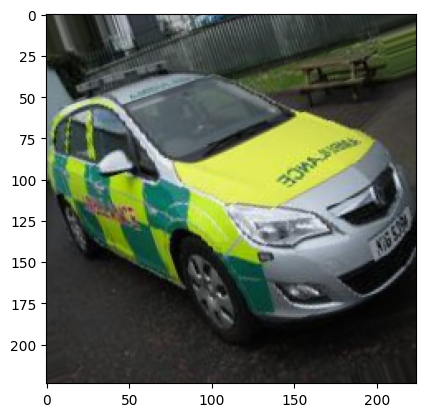

In [8]:
plt.imshow(image_gen.random_transform(image))

In [9]:
train_df = pd.read_csv(r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/train.csv") 
                     
test_df = pd.read_csv(r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/test.csv") 

In [10]:
print(train_df)

     image_names  emergency_or_not
0       1503.jpg                 0
1       1420.jpg                 0
2       1764.jpg                 0
3       1356.jpg                 0
4       1117.jpg                 0
...          ...               ...
1641    1638.jpg                 0
1642    1095.jpg                 0
1643    1130.jpg                 0
1644    1294.jpg                 0
1645     860.jpg                 1

[1646 rows x 2 columns]


In [11]:
# Changing the emergency_or_not column to a string column.
train_df['emergency_or_not']=train_df['emergency_or_not'].astype(str)

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1646 entries, 0 to 1645
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_names       1646 non-null   object
 1   emergency_or_not  1646 non-null   object
dtypes: object(2)
memory usage: 25.8+ KB


In [13]:
'''
1. The train_generator and validation_generator are the generators that will read pictures,
batch by batch, from the source directory and indefinitely generate batches of images and labels.
2. The dataframe is the data source which is set as train_df.
3. The directory is the path to the directory that contains all the images which is set to train_dir.
4. The x_col and y_col are the names of the column that contains the filenames of the images and the class labels, respectively.
5. The class_mode is the kind of classification, this is set to binary classification mode.
6. The target_size is the size to which all the images will be resized, this is set to the size of the image 224 by 224.
7. The batch_size is the size of the batches in which the generator will provide data.
'''
train_generator=image_gen.flow_from_dataframe(dataframe=train_df[:1150],
                                              directory=train_dir, 
                                              x_col='image_names', 
                                              y_col='emergency_or_not',
                                              class_mode='binary',
                                              target_size=(224,224), 
                                              batch_size=50
)

validation_generator=image_gen.flow_from_dataframe(dataframe=train_df[1150:], 
                                                   directory=train_dir, 
                                                   x_col='image_names',
                                                   y_col='emergency_or_not',
                                                   class_mode='binary', 
                                                   target_size=(224,224), 
                                                   batch_size=50 
)

Found 1150 validated image filenames belonging to 2 classes.
Found 496 validated image filenames belonging to 2 classes.


##### Constructor stage


In [14]:
from keras.models import Sequential
from keras.layers import Activation,Dropout,Conv2D,MaxPooling2D,Flatten,Dense,BatchNormalization

In [15]:
'''
1. Convolutional Layer: This layer creates 32 filters using the 3x3 kernel size.
2. Max Pooling Layer: This layer reduces the spatial size of the representation to reduce the 
parameter counts which reduces the computational complexity.
3. Flatten Layer: Flattens the input to the neural network.
4. Hidden Layer: This layer has 128 neurons and uses the relu activation function.
5. Dropout Layer: This is a regularization layer which randomly turns-off the activations of some neurons in the network
to reduce overfitting.
6. Output Layer: This is the output layer of the neural network which has one neuron per class which uses the sigmoid
activation function.
'''
model = Sequential()
# Model Layers
# Convolutional Layer
model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu',padding = 'same')) 
model.add(MaxPooling2D(pool_size=(2,2))) 

# Convolutional Layer
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu', padding = 'valid'))
#model.add(MaxPooling2D(pool_size=(2,2)))

# Convolutional Layer
#model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(224,224,3),activation = 'relu'))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
# Hidden Layers
model.add(Dense(50,activation = 'relu')) 
model.add(Dropout(0.2)) 
model.add(Dense(1,activation = 'sigmoid'))


##### Compilation stage

In [16]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',  metrics = 'accuracy')

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 401408)            0         
                                                                 
 dense (Dense)               (None, 50)                20070450  
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                        

##### Training stage

In [18]:
# Trains the model using the training data and validates the model using the validation data.
history=model.fit_generator(train_generator,epochs =10,validation_data = validation_generator)

C:\Users\whing\AppData\Local\Temp\ipykernel_6460\2141851042.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(train_generator,epochs =10,validation_data = validation_generator)


Epoch 1/10
23/23 [==============================] - 19s 807ms/step - loss: 4.6574 - accuracy: 0.5513 - val_loss: 1.0468 - val_accuracy: 0.4476
Epoch 2/10
23/23 [==============================] - 18s 772ms/step - loss: 0.6999 - accuracy: 0.6130 - val_loss: 0.5988 - val_accuracy: 0.7157
Epoch 3/10
23/23 [==============================] - 18s 780ms/step - loss: 0.6148 - accuracy: 0.6670 - val_loss: 0.5533 - val_accuracy: 0.7399
Epoch 4/10
23/23 [==============================] - 18s 771ms/step - loss: 0.5900 - accuracy: 0.6896 - val_loss: 0.5387 - val_accuracy: 0.7641
Epoch 5/10
23/23 [==============================] - 18s 772ms/step - loss: 0.5632 - accuracy: 0.7165 - val_loss: 0.5341 - val_accuracy: 0.7540
Epoch 6/10
23/23 [==============================] - 18s 771ms/step - loss: 0.5583 - accuracy: 0.7235 - val_loss: 0.5161 - val_accuracy: 0.7722
Epoch 7/10
23/23 [==============================] - 18s 776ms/step - loss: 0.5424 - accuracy: 0.7226 - val_loss: 0.5029 - val_accuracy: 0.7601

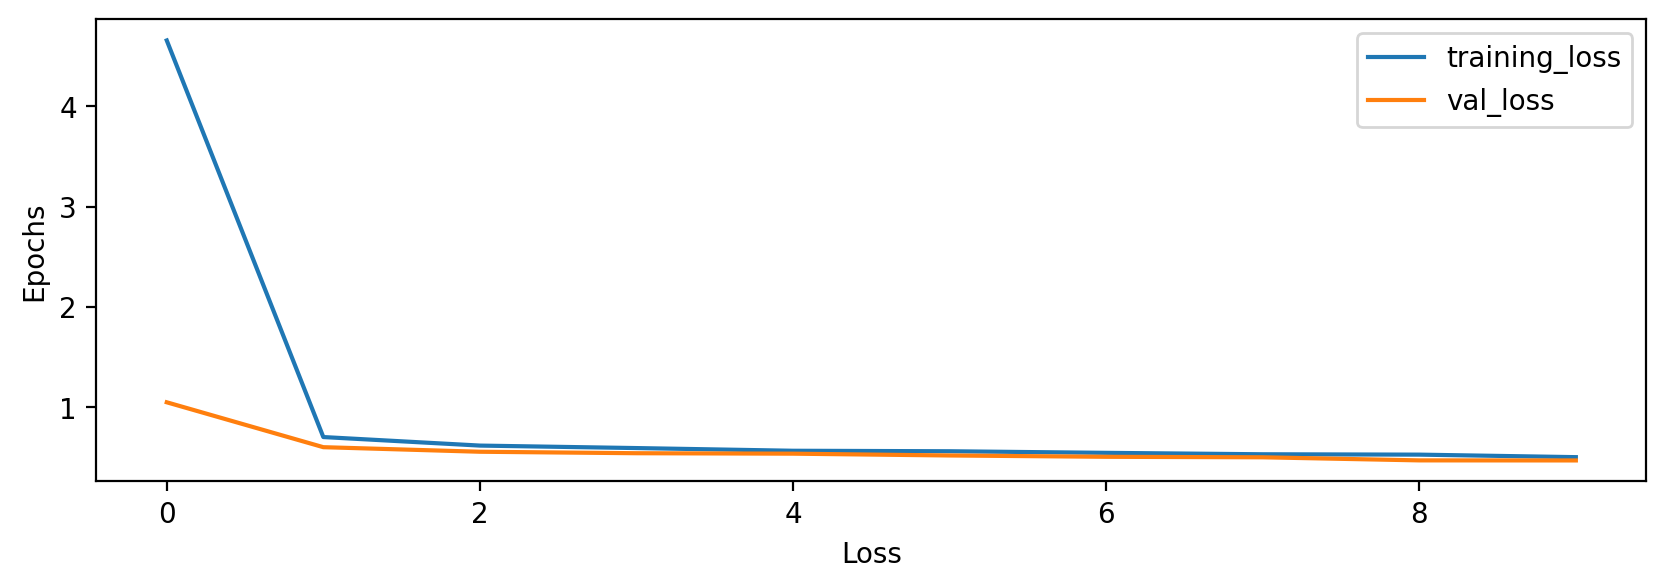

In [19]:
# Checking for overfitting.
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['loss'],
label='training_loss') 
plt.plot(history_df['val_loss'],
label='val_loss')
plt.xlabel('Loss')
plt.ylabel('Epochs') 
plt.legend() 
plt.show()

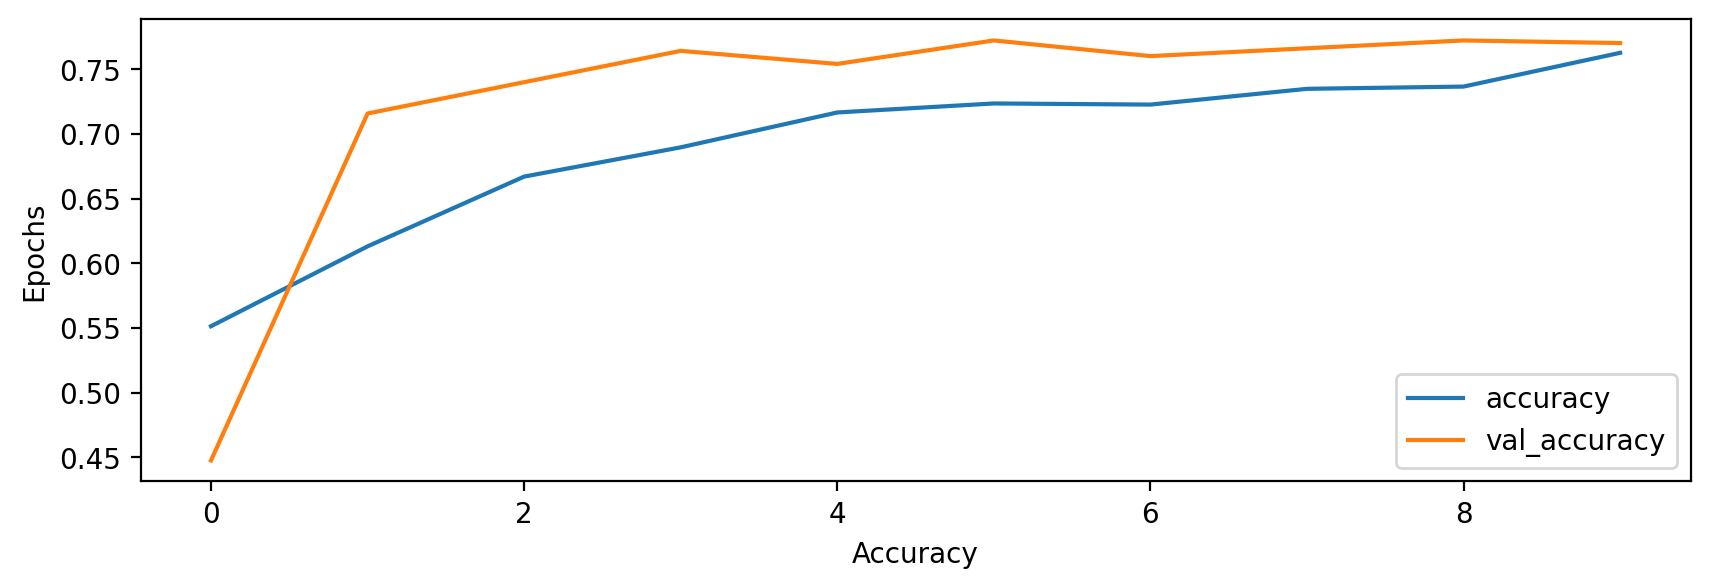

In [20]:
# Checking for overfitting.
history_df = pd.DataFrame(history.history) 
plt.figure(dpi=200, figsize = (10,3))
plt.plot(history_df['accuracy'],
label='accuracy') 
plt.plot(history_df['val_accuracy'],
label='val_accuracy')
plt.xlabel('Accuracy')
plt.ylabel('Epochs') 
plt.legend() 
plt.show()

##### Evaluation stage

In [21]:
test_generator=image_gen.flow_from_dataframe(dataframe=test_df, # specify the dataset used for training 
                                             directory=test_dir, # specify the path to the directory
                                             x_col='image_names', # specify the names of the images 
                                             y_col='emergency_or_not', # specifies the class labels
                                             class_mode=None, # specifies the kind of classification
                                             target_size=(224,224), # specifies the dimension to resize the image
                                             batch_size=1 # defines the batch size 
                                             )

Found 706 validated image filenames.


In [22]:
# Creating a prediction array for each image in the test set.
y_pred = model.predict_generator(test_generator, steps = len(test_generator.filenames))

C:\Users\whing\AppData\Local\Temp\ipykernel_6460\2645954711.py:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator, steps = len(test_generator.filenames))


In [23]:
y_pred

array([[0.6387555 ],
       [0.54492223],
       [0.25691158],
       [0.06757623],
       [0.73405504],
       [0.23553371],
       [0.05749488],
       [0.14603105],
       [0.41841468],
       [0.10571533],
       [0.43833733],
       [0.33831057],
       [0.59792626],
       [0.70701677],
       [0.12608987],
       [0.38912022],
       [0.1022479 ],
       [0.6753411 ],
       [0.09811389],
       [0.23302771],
       [0.10628895],
       [0.67761105],
       [0.1700097 ],
       [0.11119442],
       [0.07044824],
       [0.8932315 ],
       [0.41672906],
       [0.44262525],
       [0.04330273],
       [0.4344494 ],
       [0.24160725],
       [0.41207337],
       [0.27648982],
       [0.40847325],
       [0.35686323],
       [0.50535303],
       [0.03384004],
       [0.1271104 ],
       [0.8399537 ],
       [0.10841243],
       [0.76355505],
       [0.17867705],
       [0.17519407],
       [0.41571003],
       [0.2909519 ],
       [0.03220986],
       [0.4886256 ],
       [0.057

In [24]:
# Rounding the output of the model to the nearest integer.
y_pred = np.round(y_pred)

In [25]:
y_pred

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [26]:
test_df

,image_names,emergancy_or_not
0,100.jpg,1.0
1,1000.jpg,0.0
2,1001.jpg,0.0
3,1004.jpg,0.0
4,1014.jpg,0.0
...,...,...
701,981.jpg,1.0
702,986.jpg,1.0
703,99.jpg,1.0
704,990.jpg,1.0


In [27]:
sample_submission = pd.read_csv(r"C:/Users/whing/iCloudDrive/Desktop/AI and Data Science/Understanding Artificial Intelligence/Week 9_/Workshop/Emergency_Vehicles/sample_submission.csv")

In [28]:
y_true = sample_submission['emergency_or_not']

In [29]:
from sklearn.metrics import ConfusionMatrixDisplay

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 2000x3000 with 0 Axes>

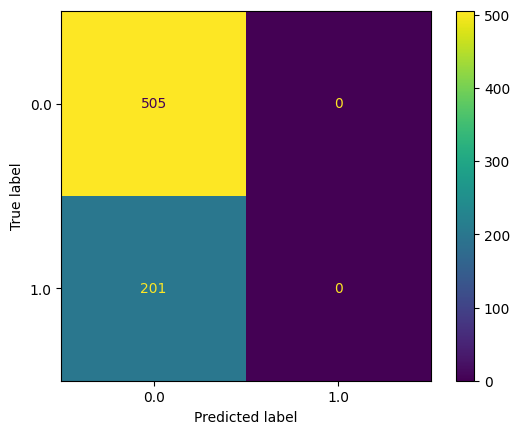

In [30]:
plt.figure(dpi = 200, figsize = (10,15))
ConfusionMatrixDisplay.from_predictions(y_pred,y_true)
plt.show

In [31]:
#Classification report
from sklearn.metrics import classification_report

In [32]:
print(classification_report(y_pred, y_true))

              precision    recall  f1-score   support

         0.0       0.72      1.00      0.83       505
         1.0       0.00      0.00      0.00       201

    accuracy                           0.72       706
   macro avg       0.36      0.50      0.42       706
weighted avg       0.51      0.72      0.60       706



C:\Users\whing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\whing\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,